<a href="https://colab.research.google.com/github/Aravinda89/fastai_bootcamp/blob/main/Gayan_DL201_FaceKeyPoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz
import fastbook
fastbook.setup_book()
import os
from fastbook import *
from IPython.display import Image, display_svg, SVG

from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

!pip install kaggle

Mounted at /content/gdrive


In [136]:
import pandas as pd
from PIL import Image
from skimage import io
from skimage.transform import resize

In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/DataSets/f_keypoints/"
%cd /content/gdrive/MyDrive/DataSets/f_keypoints/

/content/gdrive/MyDrive/DataSets/f_keypoints


Download Data

In [ ]:
# !kaggle competitions download -c facial-keypoints-detection

In [4]:
ls

IdLookupTable.csv  models/               test.csv  training.csv
kaggle.json        SampleSubmission.csv  test.zip  training.zip


In [ ]:
# file_extract('training.zip')
# file_extract('test.zip')

Load Data

In [ ]:
# df = pd.read_csv('training.csv')
# df

In [ ]:
df = pd.read_csv('training.csv',header='infer')
df

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 14...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 196 194 196 203 209 199 192 197 201 207 215 199 190 182 180 183 190 190 176 175 175 170 158 162 170 150 133 133 128 121 115 115 114 112 114 113 112 120 127 123 118 112 109 112 110 107 106 104 104 100 98 105 122 135 143 152 135 114 104 81 74 87 107 98 82 84 79 70 69 62 62 79 94 97 100 98 93 100 100 97 96 93 92 88 84 222 219 220 211 207 199 185 178 171 175 196 199 199 200 201 205 202 200 204 206 211 219 204 192 188 185 185 193 189 180 177 178 173 158 159 162 145 133 133 129 122 118 116 115 114 115 115 118 127 132 127 120 116 119 118 114 114 113 110...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 54 57 62 61 55 54 56 50 60 78 85 86 88 89 90 90 88 89 91 94 95 98 99 101 104 107 109 105 102 104 105 104 105 108 110 111 111 109 108 106 108 109 108 107 108 108 102 99 102 105 102 100 99 100 102 103 103 106 108 107 106 102 94 84 64 45 49 63 88 94 94 96 104 156 176 175 205 213 208 207 207 208 207 207 143 142 161 183 186 187 182 174 147 100 69 60 59 60 56 50 60 68 56 57 73 88 90 91 89 90 91 91 92 94 96 99 102 101 100 100 103 104 104 104 103 107 108 106 111 115 112 111 113 113 112 107 103 109 110 110 108 106 104 104 103 104 105 102 105 104 105 108...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 1 1 1 1 1 1 1 1 1 1 6 16 19 17 13 13 16 22 25 31 34 27 15 19 16 19 17 13 9 6 3 1 1 0 1 1 1 2 2 1 2 2 1 0 0 0 2 3 2 1 1 1 3 3 1 0 1 1 1 1 1 1 1 1 1 2 1 46 143 193 200 199 199 194 191 193 195 195 196 196 197 199 199 202 193 194 193 194 193 194 194 179 133 84 38 7 0

In [ ]:
df.shape

(7049, 31)

In [ ]:
df.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [ ]:
len(df.columns)

31

In [ ]:
df.loc[0,'left_eye_center_x']

66.0335639098

In [ ]:
df.loc[0,'left_eye_center_y']

39.0022736842

In [ ]:
df.loc[0,'Image']

'238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 144 149 146 144 144 144 140 131 133 133 125 110 

In [ ]:
len(df.loc[6,'Image'])

32214

# Check missing values

In [ ]:
df.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [ ]:
# Fill missing values
df.fillna(method ='ffill',inplace = True)

In [ ]:
df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [ ]:
im1 = df.loc[0,'Image']

In [ ]:
im1

'238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 144 149 146 144 144 144 140 131 133 133 125 110 

In [ ]:
len(im1)

33593

In [ ]:
im1 = im1.split(' ')

In [ ]:
len(im1) # 96x96 = 9216

9216

In [ ]:
im1 = np.array(im1, dtype='int32').reshape(96,96)

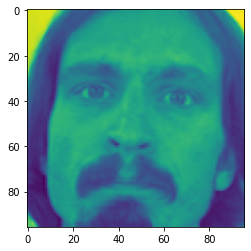

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(im1)
plt.show()

In [ ]:
df.Image.dtype

dtype('O')

In [ ]:
imarr = np.fromstring(df.Image[0], dtype='int32', sep=' ')

In [ ]:
imarr

array([238, 236, 237, ...,  70,  75,  90], dtype=int32)

In [ ]:
type(imarr)

numpy.ndarray

In [ ]:
imarr.reshape(96, 96)

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]], dtype=int32)

In [ ]:
imarr.reshape(96, 96).shape

(96, 96)

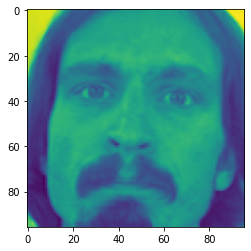

In [ ]:
plt.imshow(imarr.reshape(96, 96))
plt.show()

In [ ]:
type(Image.fromarray(np.uint8(imarr.reshape(96, 96))))

PIL.Image.Image

In [ ]:
np.uint8(imarr.reshape(96, 96))

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]], dtype=uint8)

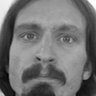

In [ ]:
PILImage(Image.fromarray(np.uint8(imarr.reshape(96, 96))))

In [ ]:
type(PILImage(Image.fromarray(np.uint8(imarr.reshape(96, 96)))))

fastai.vision.core.PILImage

In [ ]:
np.reshape(df.iloc[0,:-1].values,(-1,2)).astype('float64')

array([[66.03356391, 39.00227368],
       [30.22700752, 36.4216782 ],
       [59.58207519, 39.64742256],
       [73.13034586, 39.96999699],
       [36.35657143, 37.3894015 ],
       [23.45287218, 37.3894015 ],
       [56.95326316, 29.03364812],
       [80.22712782, 32.22813835],
       [40.22760902, 29.0023218 ],
       [16.35637895, 29.64747068],
       [44.42057143, 57.06680301],
       [61.19530827, 79.97016541],
       [28.61449624, 77.38899248],
       [43.3126015 , 72.93545865],
       [43.13070677, 84.48577444]])

In [6]:
def df2img(r):
  imarr = np.fromstring(r.Image, dtype='int32', sep=' ')
  return PILImage(Image.fromarray(np.uint8(imarr.reshape(-1, 96))))

def df2label(r):
  return np.reshape(r[0:30].values,(-1,2)).astype('float64')

In [ ]:
db = DataBlock(
                blocks = (ImageBlock, PointBlock),
                get_x = df2img,
                get_y = df2label,
                splitter = RandomSplitter(valid_pct=0.2, seed=6),
)

In [ ]:
dls = db.dataloaders(df)

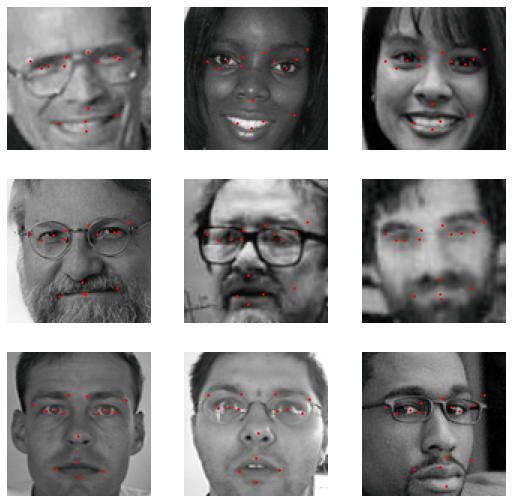

In [ ]:
dls.show_batch()

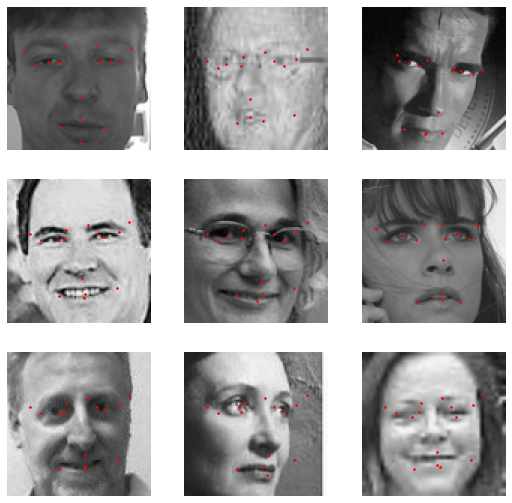

In [ ]:
dls.valid.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet18)

In [ ]:
learn.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 48 x 48   
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                      

SuggestedLRs(valley=tensor(0.0012))

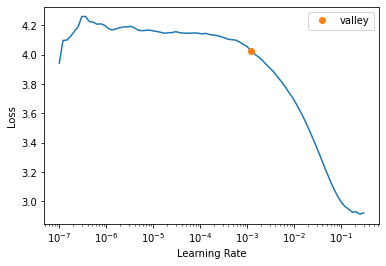

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, 0.0012)

epoch,train_loss,valid_loss,time
0,2.782645,0.504113,00:12
1,1.334256,0.132024,00:12
2,0.611218,0.044789,00:12
3,0.336247,0.024281,00:12
4,0.252124,0.020792,00:12


SuggestedLRs(valley=tensor(0.0012))

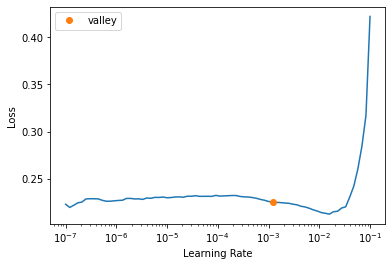

In [ ]:
learn.unfreeze()

learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, 0.0012)

epoch,train_loss,valid_loss,time
0,0.190990,0.144514,00:12
1,0.119556,0.072589,00:12
2,0.074769,0.054230,00:12
3,0.049070,0.006956,00:12
4,0.038867,0.004486,00:12


In [ ]:
# learn.export('/content/gdrive/MyDrive/Colab Notebooks/models/Face_keypoints_val_loss_0.004.pkl')
learn = load_learner('/content/gdrive/MyDrive/Colab Notebooks/models/Face_keypoints_val_loss_0.004.pkl')

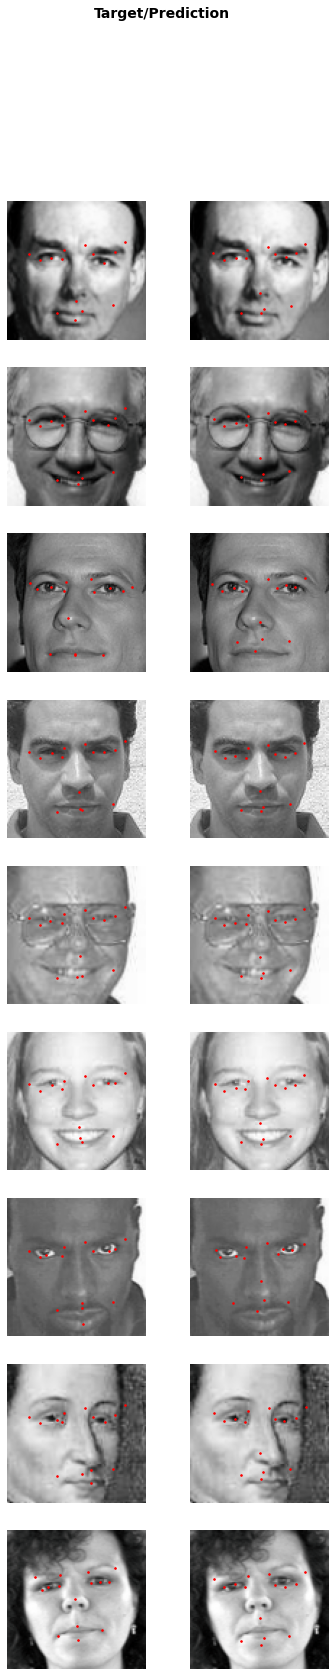

In [ ]:
learn.show_results()

In [ ]:
learn.fit_one_cycle(5, 0.0012)

epoch,train_loss,valid_loss,time
0,0.038046,0.009627,00:12
1,0.038820,0.062611,00:12
2,0.034179,0.010133,00:12
3,0.022490,0.007573,00:12
4,0.019250,0.004753,00:12


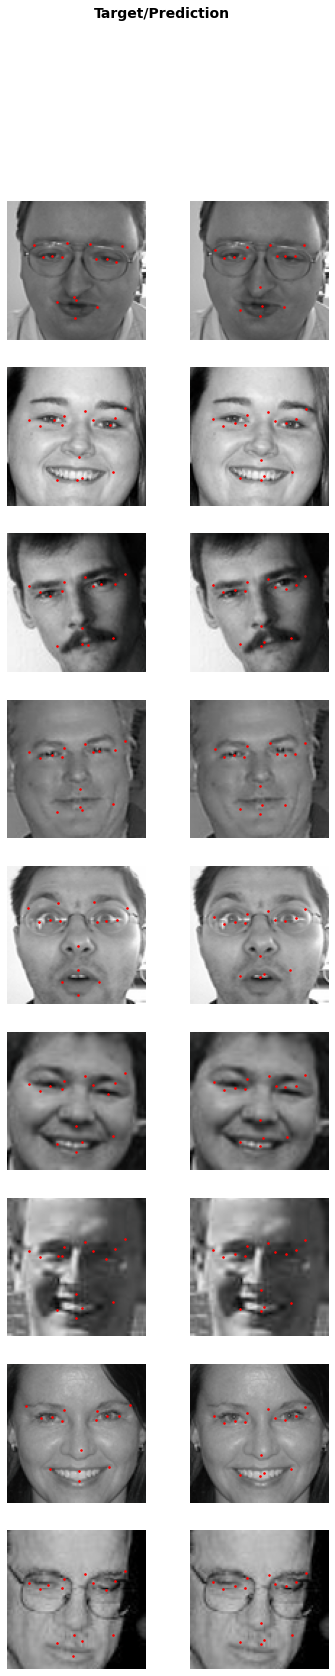

In [ ]:
learn.show_results()

In [ ]:
# Data Augmentation

In [ ]:
db = DataBlock(
                blocks = (ImageBlock, PointBlock),
                get_x = df2img,
                get_y = df2label,
                splitter = RandomSplitter(valid_pct=0.2, seed=6),
               batch_tfms = aug_transforms(do_flip=False),
)

In [ ]:
dls = db.dataloaders(df)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


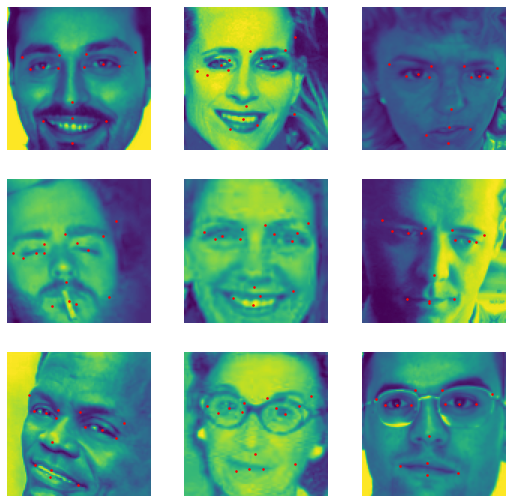

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet18)

SuggestedLRs(valley=tensor(0.0030))

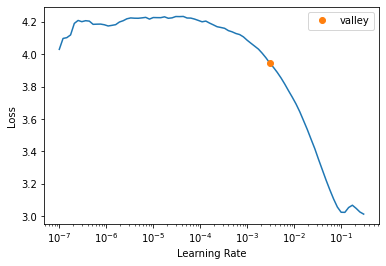

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, 0.0030)

epoch,train_loss,valid_loss,time
0,2.266993,0.374109,00:13
1,0.636433,0.036642,00:13
2,0.169549,0.016005,00:13
3,0.059953,0.006270,00:13
4,0.035612,0.005959,00:13


SuggestedLRs(valley=tensor(0.0003))

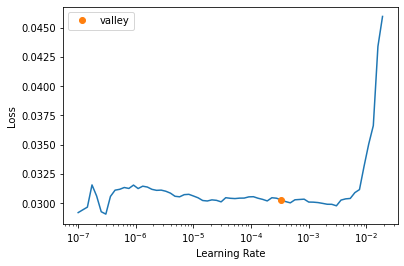

In [ ]:
learn.unfreeze()

learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, 0.0003)

epoch,train_loss,valid_loss,time
0,0.027887,0.014944,00:14
1,0.022028,0.005197,00:14
2,0.019522,0.004753,00:14
3,0.016025,0.003519,00:14
4,0.014075,0.003469,00:14


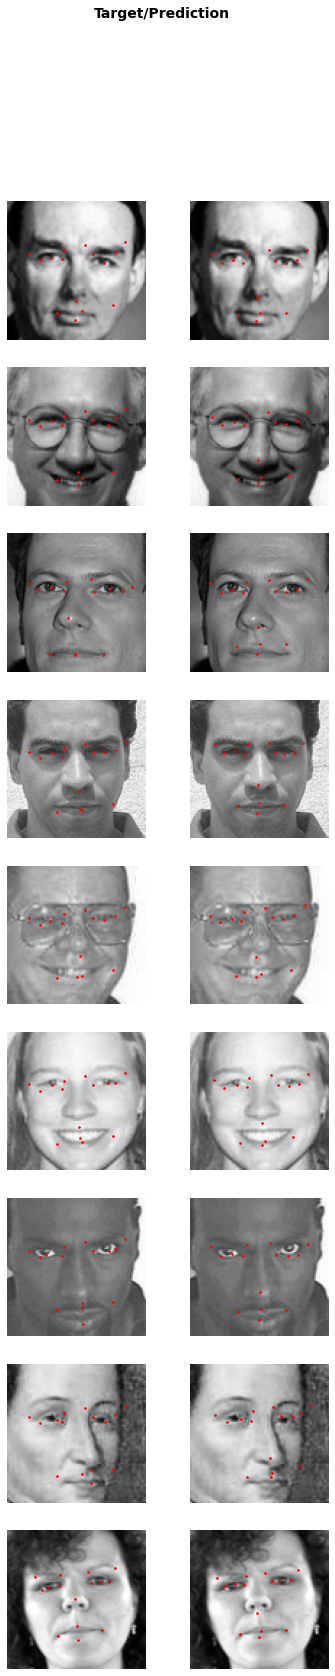

In [ ]:
learn.show_results()

In [7]:
# learn.export('/content/gdrive/MyDrive/Colab Notebooks/models/Face_keypoints_val_loss_0.003.pkl')
learn = load_learner('/content/gdrive/MyDrive/Colab Notebooks/models/Face_keypoints_val_loss_0.003.pkl')

Test image Prediction

In [8]:
df_test = pd.read_csv('test.csv',index_col='ImageId')
df_test.head()

,Image
ImageId,
1,182 183 182 182 180 180 176 169 156 137 124 103 79 62 54 56 58 48 49 45 39 37 42 43 52 61 78 93 104 107 114 115 117 122 120 122 118 114 115 118 117 123 122 122 112 113 118 125 124 122 109 101 96 102 108 107 100 89 76 67 58 48 44 36 32 21 12 5 15 21 24 33 32 41 52 63 71 90 106 121 152 173 180 183 182 182 183 182 182 181 182 182 183 182 182 182 182 181 181 181 182 179 177 162 136 106 84 64 49 44 40 50 50 42 36 33 32 43 51 67 77 94 106 121 124 128 127 126 128 128 129 126 126 122 128 123 128 123 129 127 133 123 128 129 135 127 122 111 115 118 120 121 118 114 107 107 99 89 74 70 59 47 29 18 16 ...
2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 47 37 33 32 33 35 50 55 54 50 51 61 78 92 100 101 79 55 47 52 50 47 39 38 52 46 25 25 39 52 63 59 67 79 68 48 44 44 43 44 45 53 56 55 50 48 54 58 51 52 67 72 86 76 64 75 97 97 83 85 81 67 53 45 39 33 33 53 73 60 44 47 72 98 121 120 117 127 120 115 117 68 85 84 72 63 52 57 69 69 49 34 40 46 57 63 58 45 39 30 31 35 47 52 47 52 53 54 70 84 93 104 94 67 50 48 49 48 39 35 48 53 44 33 35 47 66 73 73 73 69 58 48 42 41 51 52 54 58 51 49 53 60 59 49 46 61 72 87 82 66 71 93 108 95 83 85 81 64 58 54 42 33 48 66 57 45 53 72 88 110 125 125 134 132 111 106 63...
3,177 176 174 170 169 169 168 166 166 166 161 140 69 5 1 2 1 18 61 96 110 122 129 129 127 125 125 119 112 110 111 107 102 102 99 96 98 95 91 90 91 94 92 88 86 86 86 85 86 87 84 84 87 88 85 85 86 84 87 97 96 96 99 101 105 107 111 109 94 68 31 3 2 48 141 164 137 123 124 120 106 100 103 107 114 115 112 113 112 110 114 113 114 114 111 111 176 174 171 169 168 166 166 164 162 163 158 107 24 0 2 0 7 50 98 119 128 134 131 132 131 129 125 120 116 110 113 111 104 105 106 101 97 92 86 88 90 92 92 93 91 86 88 87 89 89 85 88 88 87 89 88 87 88 89 93 97 101 101 100 103 109 110 109 106 93 63 20 0 7 83 155 1...
4,176 174 174 175 174 174 176 176 175 171 165 157 143 134 134 137 138 137 135 135 134 137 135 128 128 129 122 110 107 112 115 123 134 147 151 151 152 155 157 160 164 166 168 168 167 168 169 172 177 178 180 184 188 192 194 191 189 184 177 171 165 154 146 130 118 111 104 99 99 101 105 112 117 119 119 117 116 116 114 121 135 151 161 166 173 174 174 175 174 173 173 173 173 171 171 172 175 175 174 176 176 174 175 176 174 170 159 149 141 136 136 136 138 143 140 136 136 133 123 125 133 126 114 118 126 133 144 157 166 169 166 167 169 174 178 183 191 194 193 189 190 192 196 199 203 206 206 207 211 21...
5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 38 36 34 31 31 32 32 34 34 34 35 33 32 30 31 33 33 31 33 35 35 35 33 34 34 31 34 33 32 35 39 36 39 42 42 42 40 39 38 38 34 33 34 35 38 37 36 37 41 44 48 51 51 52 54 56 56 60 61 61 63 62 67 76 75 79 81 81 62 52 209 255 251 254 254 254 254 254 254 254 254 254 49 49 47 111 153 136 88 51 43 36 38 37 39 38 36 34 32 32 34 32 34 35 34 32 30 32 32 31 31 31 32 33 32 33 37 35 38 39 37 34 33 34 37 39 40 38 42 44 43 42 41 40 40 38 35 37 38 39 41 41 40 38 42 42 44 48 51 52 54 56 57 61 62 63 66 64 64 73 76 78 83 82 89 51 73 216 255 253 254 254 254 254 254 25...


In [ ]:
len(df_test)

1783

In [9]:
def df2img(r):
  imarr = np.fromstring(r.Image, dtype='int32', sep=' ')
  return PILImage(Image.fromarray(np.uint8(imarr.reshape(-1, 96))))

Predict Random Test Image

In [67]:
def predict_random_img(df_test):
  idx = random.choice(range(len(df_test)))   # Choose Random image
  imarr = np.fromstring(df_test.loc[idx,'Image'], dtype='int32', sep=' ')
  imgt = PILImage(Image.fromarray(np.uint8(imarr.reshape(-1, 96))))
  print(imgt.shape)
  pnt_img = TensorImage(imgt)   # convert image into TensorImage

  pred = learn.predict(imgt)  # Predict
  tpnts = pred[0]

  ctx = pnt_img.show() # Plot 
  tpnts.show(ctx=ctx)

(96, 96)


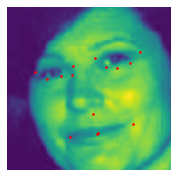

In [68]:
predict_random_img(df_test)

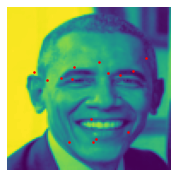

In [145]:
imgs = glob.glob('/content/gdrive/MyDrive/models/face/*.jpeg')
img_path = random.choice(imgs)
img = io.imread(img_path, as_gray=True)
gray_im = resize(img, (96, 96))

im = PILImage.create(gray_im)
pnt_img = TensorImage(im)

pred = learn.predict(im)
tpnts = pred[0]

ctx = pnt_img.show() 
tpnts.show(ctx=ctx)